/var/folders/kn/kyxv4hjd05s8hfp0231s5y900000gn/T/ipykernel_57765/886304523.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file_path)


Data type: <class 'torch.Tensor'>, Shape: torch.Size([33945, 1, 240])
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33945 entries, 0 to 33944
Columns: 240 entries, Week_1 to Week_240
dtypes: float64(240)
memory usage: 62.2 MB
None

Basic Statistics:
             Week_1        Week_2        Week_3        Week_4        Week_5  \
count  33945.000000  33945.000000  33945.000000  33945.000000  33945.000000   
mean      25.811664     48.014052     48.880662     46.103866     51.774787   
std       53.323981    101.725239     93.823919     90.540350     96.729020   
min        0.000000    -89.000000      0.000000      0.000000      0.000000   
25%        4.000000     10.000000     11.000000     10.000000     12.000000   
50%       12.000000     23.000000     24.000000     23.000000     26.000000   
75%       27.000000     52.000000     53.000000     50.000000     57.000000   
max     2174.000000   4446.000000   5428.342000   4139.000000   5634.653000   

             Week_6 

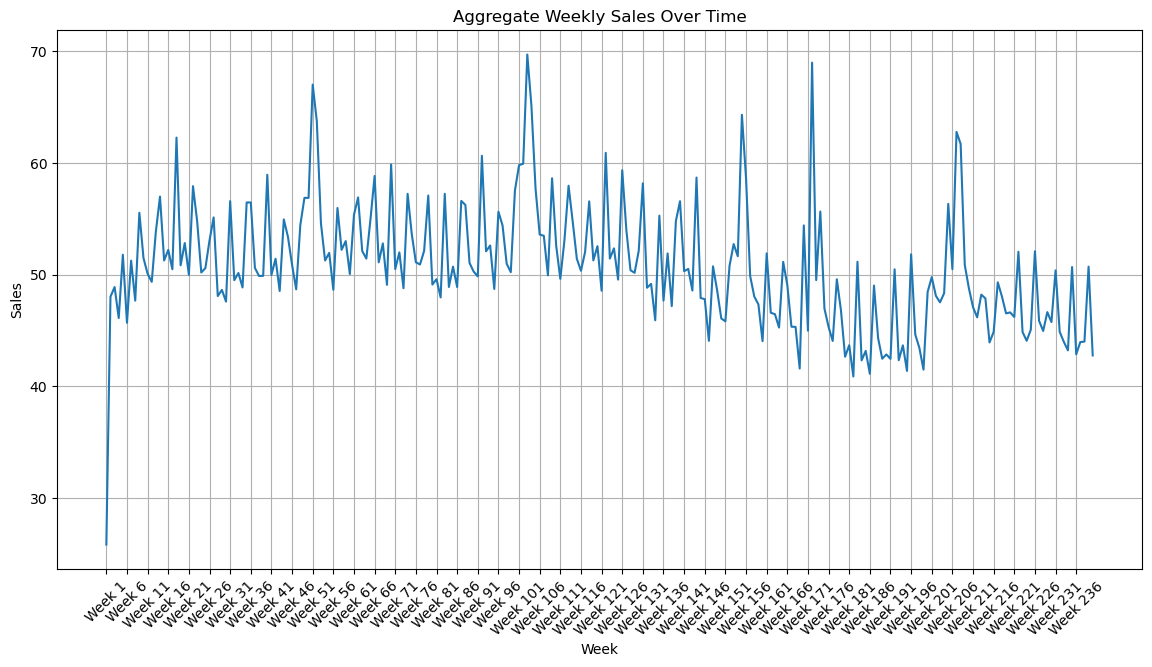

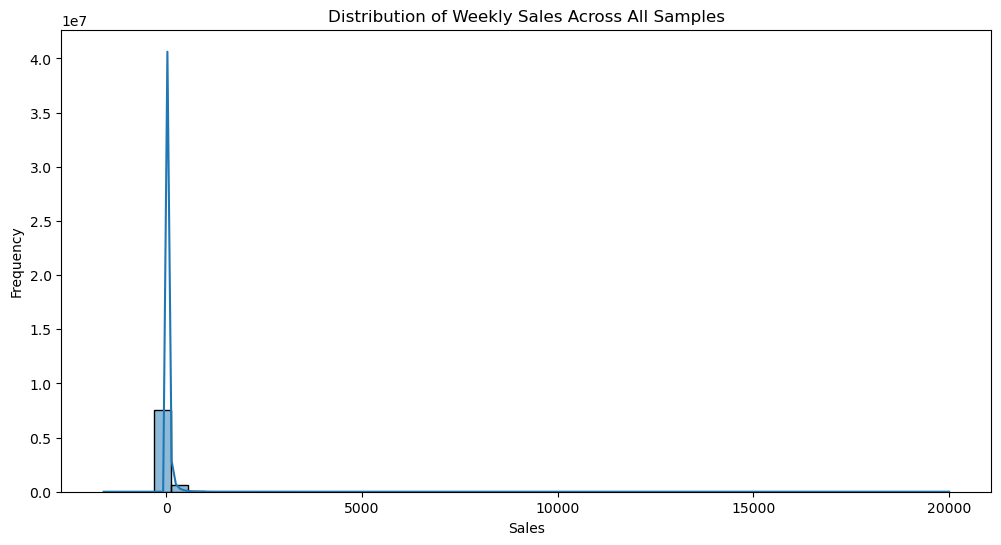

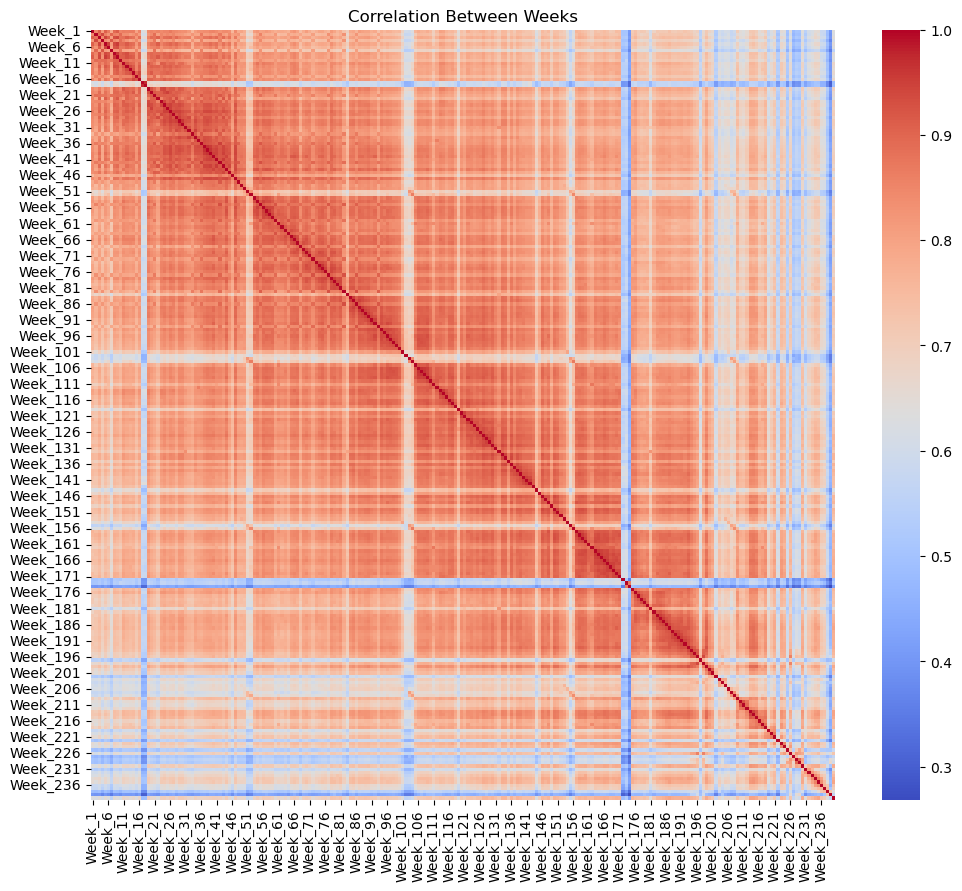

In [4]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the .pt file
file_path = "data_files/favorita/weekly_sales.pt"
data = torch.load(file_path)

# Check the shape and type of the loaded data
print(f"Data type: {type(data)}, Shape: {data.shape}")

# Convert to NumPy array for easier manipulation
data_np = data.numpy()

# Check if it's 3D
if data_np.ndim == 3:
    # Reshape the data for analysis
    # Assuming axis 0 = samples (e.g., items), axis 1 = group (e.g., stores), axis 2 = time (e.g., weeks)
    reshaped_data = data_np.squeeze(1)  # Remove the singleton dimension (shape becomes (33945, 240))
    
    # Create a DataFrame with time as columns and samples as rows
    df = pd.DataFrame(reshaped_data)
    df.columns = [f"Week_{i+1}" for i in range(reshaped_data.shape[1])]  # Rename columns as "Week_1", "Week_2", ...
else:
    raise ValueError("The data format is not supported for this script.")

# Print dataset info
print("Dataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum().sum())

# Aggregate weekly data to analyze trends (e.g., mean across all samples for each week)
weekly_aggregates = df.mean()

# Plot time series of aggregate weekly sales
plt.figure(figsize=(14, 7))
sns.lineplot(x=weekly_aggregates.index, y=weekly_aggregates.values)
plt.title("Aggregate Weekly Sales Over Time")
plt.xlabel("Week")
plt.ylabel("Sales")
plt.xticks(ticks=np.arange(0, reshaped_data.shape[1], 5), labels=[f"Week {i}" for i in range(1, reshaped_data.shape[1]+1, 5)], rotation=45)
plt.grid(True)
plt.show()

# Distribution of sales values
plt.figure(figsize=(12, 6))
sns.histplot(df.values.flatten(), bins=50, kde=True)
plt.title("Distribution of Weekly Sales Across All Samples")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap of weekly sales
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Between Weeks")
plt.show()


# Visualizing Per Store

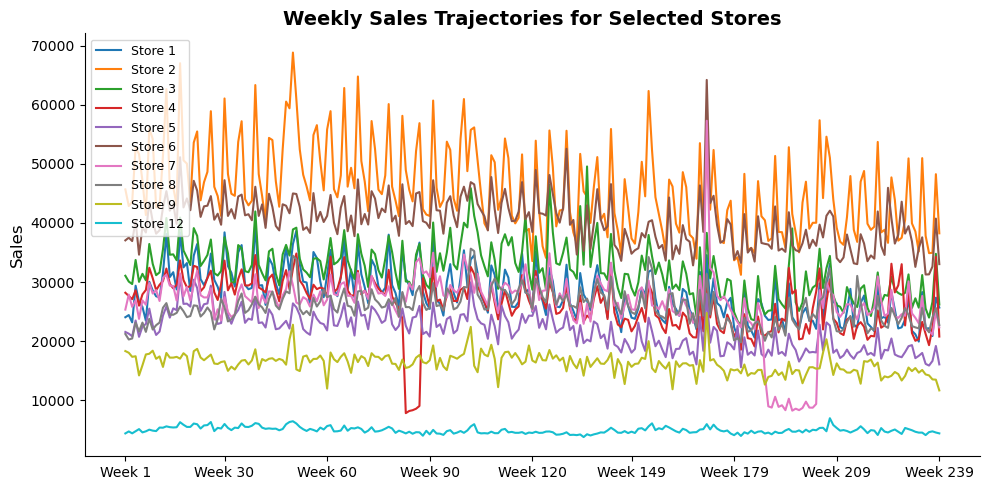

In [16]:
plt.figure(figsize=(10, 5))

# Plot each store's trajectory
for store in sample_stores:
    sales = store_weekly_sales.loc[store].values
    plt.plot(range(1, num_weeks+1), sales, linewidth=1.5, label=f"Store {store}")

# Reduce the number of x-ticks to 1/4th of total weeks
xtick_indices = np.linspace(1, num_weeks, num_weeks // 25, dtype=int)
plt.xticks(xtick_indices, [f"Week {i}" for i in xtick_indices])

# Labels and title
plt.title("Weekly Sales Trajectories for Selected Stores", fontsize=14, fontweight='bold')
# plt.xlabel("Week", fontsize=12)
plt.ylabel("Sales", fontsize=12)

# Remove grid
plt.grid(False)

# Optionally remove top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show legend with a sensible location
plt.legend(loc="upper left", fontsize=9)
plt.tight_layout()
plt.show()


Aggregate Metrics Across Time (Mean and Standard Deviation): use to motivate base-stock policy

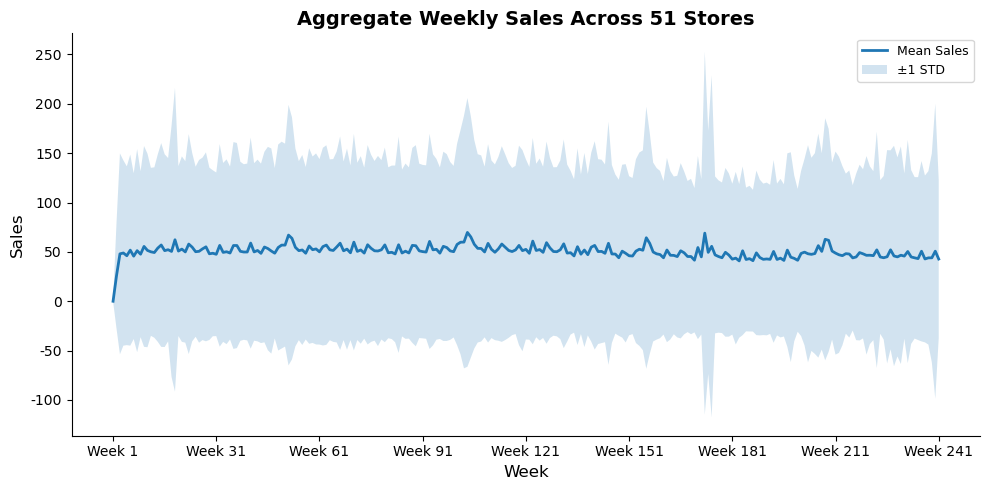

In [31]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 5))

# Correct range for x to match the length of mean_sales
plt.plot(range(1, len(mean_sales) + 1), mean_sales.values, linewidth=2, label="Mean Sales")

# Shade area for mean ± std
plt.fill_between(range(1, len(mean_sales) + 1),
                 (mean_sales - std_sales).values,
                 (mean_sales + std_sales).values,
                 alpha=0.2, label="±1 STD")

# Reduce the number of x-ticks to approximately 1/4th of total weeks
xtick_indices = np.linspace(1, len(mean_sales), len(mean_sales) // 25, dtype=int)
plt.xticks(xtick_indices, [f"Week {i}" for i in xtick_indices])

# Labels and title
plt.title("Aggregate Weekly Sales Across 51 Stores", fontsize=14, fontweight='bold')
plt.xlabel("Week", fontsize=12)
plt.ylabel("Sales", fontsize=12)

# Apply custom y-axis formatter to prevent truncation
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))  # Add commas to large numbers

# Remove grid
plt.grid(False)

# Remove top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(fontsize=9)
plt.tight_layout()
plt.show()


In [28]:
import pandas as pd

# Load the metadata
metadata_path = "data_files/favorita/tensors_row_info.csv"
metadata = pd.read_csv(metadata_path)

# Count unique stores
total_stores = metadata["store_nbr"].nunique()
print(f"Total number of stores: {total_stores}")


Total number of stores: 51


# Experiment Results

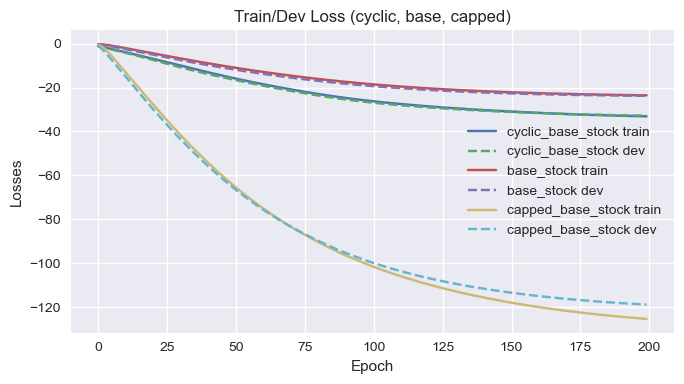

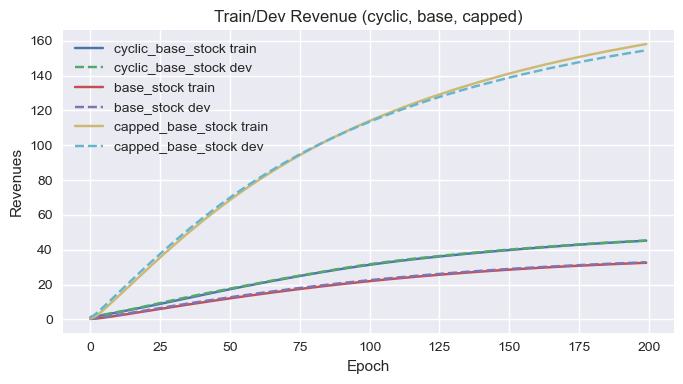

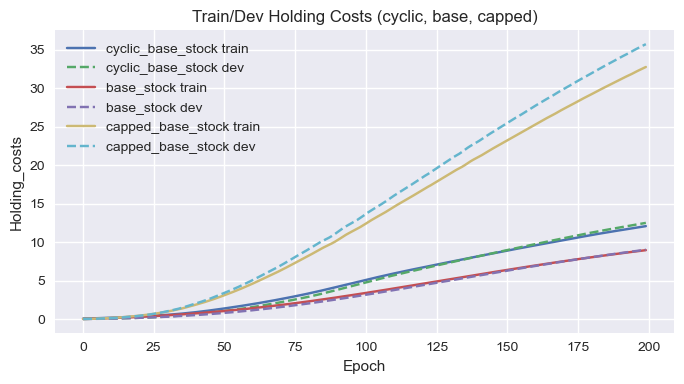

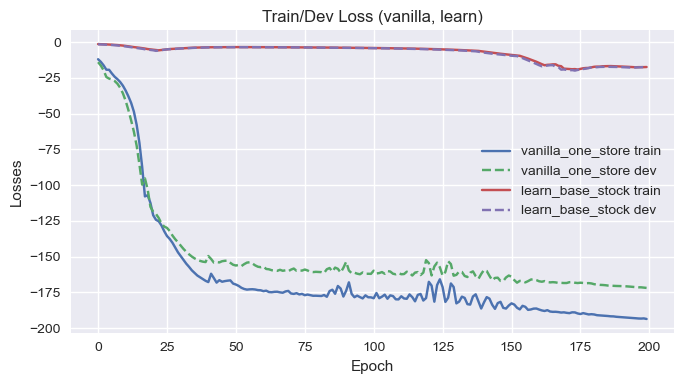

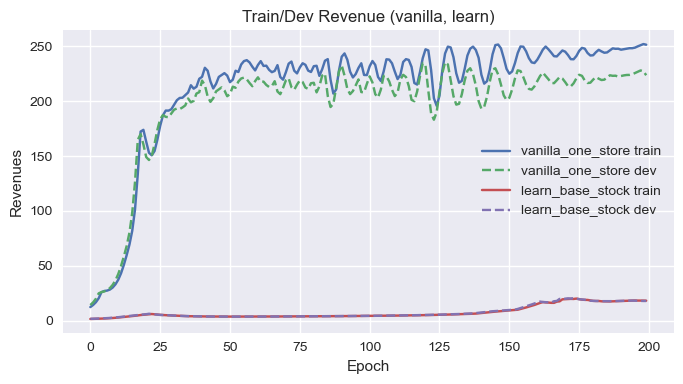

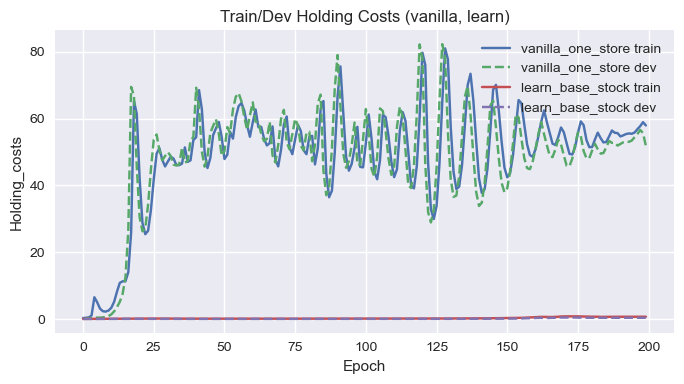

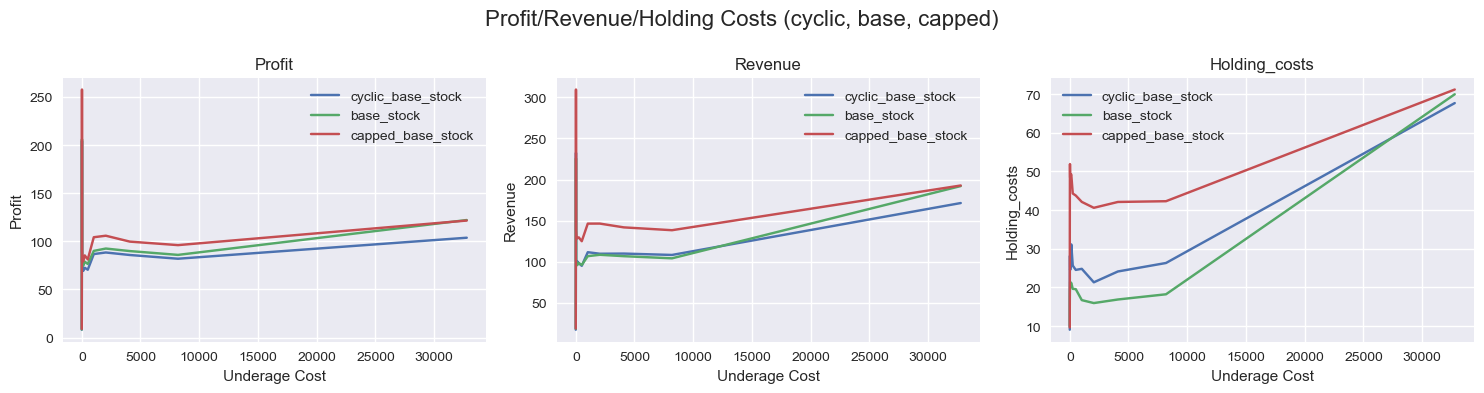

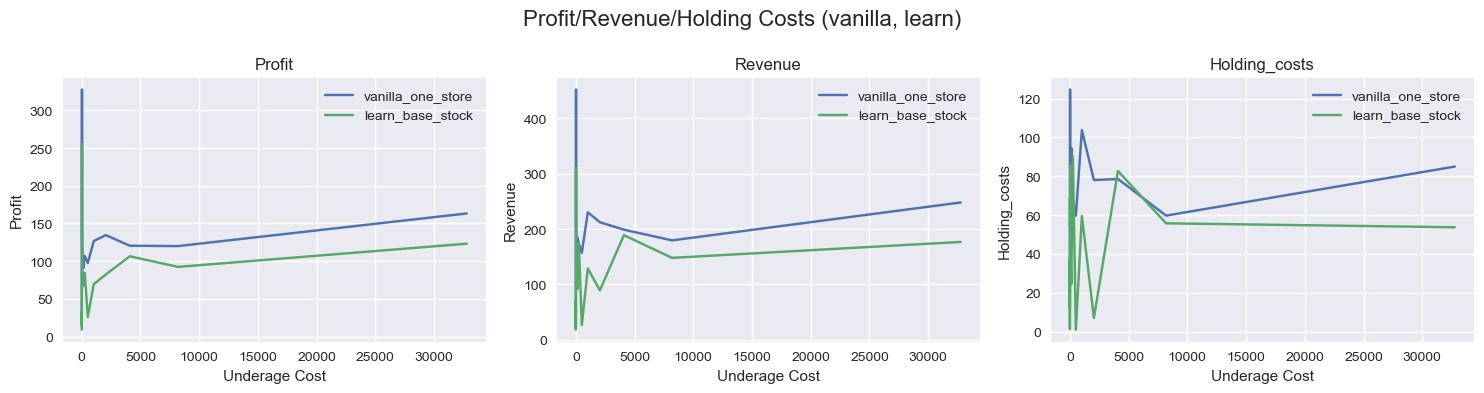

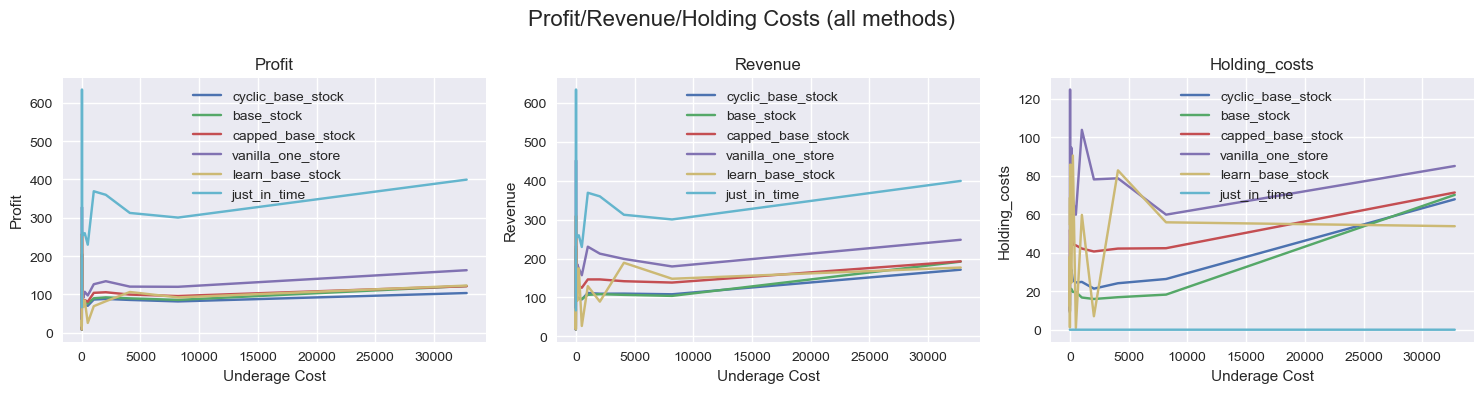

In [7]:
import os
import glob
import json
import re
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.rcParams.update({'font.size': 12})

base_dir = 'results/2024_12_08'

# Groups for train/dev curves
group_train_dev_1 = ("cyclic_base_stock", "base_stock", "capped_base_stock")
group_train_dev_2 = ("vanilla_one_store", "learn_base_stock")

# Groups for profit/revenue/holding cost curves
# Include just_in_time in the last group if available
group_profit_rev_hold_1 = ("cyclic_base_stock", "base_stock", "capped_base_stock")
group_profit_rev_hold_2 = ("vanilla_one_store", "learn_base_stock")

# Check if just_in_time directory exists
all_methods = os.listdir(base_dir)
if "just_in_time" in all_methods:
    group_profit_rev_hold_all = ("cyclic_base_stock", "base_stock", "capped_base_stock", 
                                 "vanilla_one_store", "learn_base_stock", "just_in_time")
else:
    group_profit_rev_hold_all = ("cyclic_base_stock", "base_stock", "capped_base_stock", 
                                 "vanilla_one_store", "learn_base_stock")

def extract_param(filename, param_name):
    # Extract a parameter from filename, e.g. underage_cost_XX or num_samples_XX
    # Returns None if not found
    match = re.search(f"{param_name}_(\d+)", filename)
    return int(match.group(1)) if match else None

def load_data(dir_path):
    data = {}
    for method in os.listdir(dir_path):
        method_path = os.path.join(dir_path, method)
        if not os.path.isdir(method_path):
            continue
        method_data = {
            'train': {},  # dict keyed by (param_type, value) -> {'losses': [], 'revenues': [], 'holding_costs': []}
            'dev': {},
            'test': []    # list of tuples (underage_cost, num_samples, loss, revenue, holding_costs)
        }

        train_files = glob.glob(os.path.join(method_path, "*_metrics_train.json"))
        test_files = glob.glob(os.path.join(method_path, "*_metrics_test.json"))

        # Process train files
        for f in train_files:
            with open(f, 'r') as jf:
                js = json.load(jf)
            num_samples = extract_param(f, "num_samples")
            underage_cost = extract_param(f, "underage_cost")
            key = ('num_samples', num_samples) if num_samples is not None else ('underage_cost', underage_cost)
            method_data['train'][key] = js['train']
            method_data['dev'][key] = js['dev']

        # Process test files
        for f in test_files:
            with open(f, 'r') as jf:
                js = json.load(jf)
            num_samples = extract_param(f, "num_samples")
            underage_cost = extract_param(f, "underage_cost")

            loss = js['test']['loss']
            revenue = js['test']['revenue']
            holding_costs = js['test']['holding_costs']
            method_data['test'].append((underage_cost, num_samples, loss, revenue, holding_costs))

        data[method] = method_data
    return data

data = load_data(base_dir)

def plot_train_dev_curves(methods, metric='losses', title=""):
    # Plot mean and std if available. If no std, just plot line.
    # Our data: each run is just one array, so we don't have multiple runs => no std from the given data.
    # We'll just plot the curves as is for now.
    plt.figure(figsize=(7,4))
    for m in methods:
        # Just pick the first run (key) to plot, or skip if none
        if data[m]['train']:
            key = list(data[m]['train'].keys())[0]
            train_y = data[m]['train'][key][metric]
            dev_y = data[m]['dev'][key][metric]

            x_train = np.arange(len(train_y))
            x_dev = np.arange(len(dev_y))

            # Since no std data given, plot just the line
            plt.plot(x_train, train_y, label=f"{m} train")
            plt.plot(x_dev, dev_y, label=f"{m} dev", linestyle='--')

    plt.xlabel("Epoch")
    plt.ylabel(metric.capitalize())
    plt.title(title if title else f"{metric.capitalize()} Train/Dev Curves")
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_profit_rev_hold_curves(methods, x_param='underage_cost', title=""):
    # We'll assume underage_cost is the primary x-axis.
    # For each method, we might have multiple test points at different underage costs.
    # Plot profit (revenue - holding_costs), revenue, and holding_cost side-by-side
    fig, axes = plt.subplots(1, 3, figsize=(15,4))
    metrics = ['profit', 'revenue', 'holding_costs']
    for i, metric in enumerate(metrics):
        ax = axes[i]
        for m in methods:
            # Extract test results
            xs = []
            vals = []
            for (uc, ns, l, r, h) in data[m]['test']:
                x = uc if uc is not None else ns
                if x is not None:
                    if metric == 'profit':
                        val = r - h
                    elif metric == 'revenue':
                        val = r
                    else:
                        val = h
                    xs.append(x)
                    vals.append(val)

            if xs:
                xs, vals = zip(*sorted(zip(xs, vals), key=lambda x: x[0]))
                xs = np.array(xs)
                vals = np.array(vals)

                # No multiple runs => no std data given. Just plot a line.
                ax.plot(xs, vals, label=m)

        ax.set_xlabel("Underage Cost")
        ax.set_ylabel(metric.capitalize())
        ax.set_title(metric.capitalize())
        ax.legend()

    fig.suptitle(title if title else "Performance Curves")
    fig.tight_layout()
    plt.show()

# Plot train/dev curves for cyclic_base_stock, base_stock, capped_base_stock
plot_train_dev_curves(group_train_dev_1, metric='losses', title="Train/Dev Loss (cyclic, base, capped)")
plot_train_dev_curves(group_train_dev_1, metric='revenues', title="Train/Dev Revenue (cyclic, base, capped)")
plot_train_dev_curves(group_train_dev_1, metric='holding_costs', title="Train/Dev Holding Costs (cyclic, base, capped)")

# Plot train/dev curves for vanilla_one_store, learn_base_stock
plot_train_dev_curves(group_train_dev_2, metric='losses', title="Train/Dev Loss (vanilla, learn)")
plot_train_dev_curves(group_train_dev_2, metric='revenues', title="Train/Dev Revenue (vanilla, learn)")
plot_train_dev_curves(group_train_dev_2, metric='holding_costs', title="Train/Dev Holding Costs (vanilla, learn)")

# Profit/Revenue/Holding cost curves for cyclic_base_stock, base_stock, capped_base_stock
plot_profit_rev_hold_curves(group_profit_rev_hold_1, title="Profit/Revenue/Holding Costs (cyclic, base, capped)")

# Profit/Revenue/Holding cost curves for vanilla_one_store, learn_base_stock
plot_profit_rev_hold_curves(group_profit_rev_hold_2, title="Profit/Revenue/Holding Costs (vanilla, learn)")

# Profit/Revenue/Holding cost curves for altogether (including just_in_time if available)
plot_profit_rev_hold_curves(group_profit_rev_hold_all, title="Profit/Revenue/Holding Costs (all methods)")


In [ ]:
import os
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

class InventoryControlVisualizer:
    def __init__(self, base_dir):
        self.base_dir = base_dir
        self.colors = {
            'cyclic_base_stock': '#1f77b4',
            'base_stock': '#ff7f0e',
            'capped_base_stock': '#2ca02c',
            'vanilla_one_store': '#d62728',
            'learn_base_stock': '#9467bd',
            'just_in_time': '#8c564b'
        }
        self.names = {
            'cyclic_base_stock': 'Cyclic Base Stock',
            'base_stock': 'Base Stock',
            'capped_base_stock': 'Capped Base Stock',
            'vanilla_one_store': 'Vanilla One Store',
            'learn_base_stock': 'Learn Base Stock',
            'just_in_time': 'Just-in-time'
        }
    
    def extract_param_from_filename(self, filename):
        """Extract both underage_cost and num_samples from filename if present."""
        filename = os.path.basename(filename)
        params = {}
        
        # Extract num_samples
        num_samples_match = re.search(r'num_samples_(\d+)', filename)
        if num_samples_match:
            params['num_samples'] = int(num_samples_match.group(1))
            
        # Extract underage_cost
        underage_match = re.search(r'underage_cost_(\d+)', filename)
        if underage_match:
            params['underage_cost'] = float(underage_match.group(1))
            
        return params

    def load_metrics(self, model_type, phase='test'):
        pattern = os.path.join(self.base_dir, model_type, f'*_metrics_{phase}.json')
        files = glob.glob(pattern)
        data = []
        
        for file in files:
            params = self.extract_param_from_filename(file)
            if not params:
                continue
                
            with open(file, 'r') as f:
                metrics = json.load(f)
                
                if phase in metrics:
                    phase_data = metrics[phase]
                    if isinstance(phase_data, dict):
                        revenue = phase_data.get('revenue', 0)
                        holding_costs = phase_data.get('holding_costs', 0)
                        
                        entry = {
                            'revenue': revenue,
                            'holding_costs': holding_costs,
                            'profit': revenue - holding_costs,
                            **params  # Add both parameters if present
                        }
                        data.append(entry)
                            
        return pd.DataFrame(data)

    def plot_metrics_by_param(self, model_groups, param_name, title):
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        metrics = ['profit', 'revenue', 'holding_costs']
        
        for ax, metric in zip(axes, metrics):
            for model in model_groups:
                data = self.load_metrics(model)
                if not data.empty and param_name in data.columns:
                    data_grouped = data.groupby(param_name)[metric].mean().reset_index()
                    data_grouped = data_grouped.sort_values(param_name)
                    
                    ax.plot(data_grouped[param_name], data_grouped[metric],
                           label=self.names[model],
                           color=self.colors[model],
                           marker='o')
            
            ax.set_title(f'{metric.title()}')
            x_label = 'Average Unit Underage Cost' if param_name == 'underage_cost' else 'Number of Samples'
            ax.set_xlabel(x_label)
            ax.set_ylabel(metric.title())
            
            if metric == 'profit':
                ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            
            # Set x-axis to log scale for num_samples
            if param_name == 'num_samples':
                ax.set_xscale('log')
        
        plt.suptitle(title, y=1.05)
        plt.tight_layout()
        return fig

    def style_plot(self):
        plt.style.use('seaborn')
        sns.set_palette("deep")
        plt.rcParams['figure.facecolor'] = 'white'
        plt.rcParams['axes.facecolor'] = 'white'
        plt.rcParams['font.size'] = 12
        plt.rcParams['axes.labelsize'] = 12
        plt.rcParams['axes.titlesize'] = 14
        plt.rcParams['figure.titlesize'] = 16

# Example usage
if __name__ == "__main__":
    base_dir = "results/2024_12_08"
    visualizer = InventoryControlVisualizer(base_dir)
    visualizer.style_plot()
    
    # Define model groups
    base_stock_models = ['cyclic_base_stock', 'base_stock', 'capped_base_stock']
    learning_models = ['vanilla_one_store', 'learn_base_stock']
    all_models = base_stock_models + learning_models + ['just_in_time']
    
    # Create plots for both parameter types
    configs = [
        (base_stock_models, 'Base Stock Models'),
        (learning_models, 'Learning Models'),
        (all_models, 'All Models')
    ]
    
    # Plot underage cost variations
    for models, name in configs:
        fig = visualizer.plot_metrics_by_param(
            models, 
            'underage_cost',
            f'{name} Performance (Varying Underage Cost)'
        )
        fig.savefig(f'{name.lower().replace(" ", "_")}_underage_cost.png',
                    bbox_inches='tight', dpi=300)
        plt.close()
    
    # Plot num_samples variations
    for models, name in configs:
        fig = visualizer.plot_metrics_by_param(
            models,
            'num_samples',
            f'{name} Performance (Varying Number of Samples)'
        )
        fig.savefig(f'plots/{name.lower().replace(" ", "_")}_num_samples.png',
                    bbox_inches='tight', dpi=300)
        plt.close()